In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import os
import warnings
warnings.filterwarnings('ignore')
figsize=(10,6)
ylim=(0,1010)

In [2]:
def show_config(file_path):
    df_config = pd.read_csv(file_path, delimiter=':', header=None)
    df_config.columns = ['Parameters', 'Settings']
    print df_config
    #return the goal reward value for problem
    return df_config['Settings'].iloc[-1]

def plot_training(file_path, goal, ylim=ylim):
    df_pole = pd.read_csv(file_path, delim_whitespace=True, index_col=0)
    print '-----Training Data-----'
    print 'Max Average Reward:', df_pole.max()[1], 'Episode:', df_pole.idxmax()[1]
    print 'Max Episode Reward:', df_pole.max()[0], 'Episode:', df_pole.idxmax()[0]
    print 'Min Episode Reward:', df_pole.min()[0], 'Episode:', df_pole.idxmin()[0]
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_color_cycle(['blue', 'red', 'green'])
    plt.title("Training Episodes")
    plt.plot(df_pole['reward'], label='Episode Reward')
    plt.plot(df_pole['average_reward'], label='Average of Last 100 Episodes')
    plt.plot([0, df_pole.shape[0]], [goal, goal], label='Average Reward Goal Value')
    plt.xlim([0,df_pole.shape[0]])
    plt.ylim(ylim)
    ax.lines[-2].set_linewidth(2)
    plt.legend(loc='upper left')
    plt.show()
    
    
def plot_testing(file_path, goal, ylim=ylim):
    df_pole = pd.read_csv(file_path, delim_whitespace=True, index_col=0)
    print '-----Testing Data-----'
    print 'Average Reward:', df_pole['reward'].mean()
    #print 'Final Average Reward:', df_pole['average'].iloc[-1], 'Episode:', df_pole.index[-1]
    print 'Max Episode Reward:', df_pole.max()[0], 'Episode:', df_pole.idxmax()[0]
    print 'Min Episode Reward:', df_pole.min()[0], 'Episode:', df_pole.idxmin()[0]
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_color_cycle(['blue', 'red', 'green'])
    plt.title("Testing Episodes")
    plt.plot(df_pole['reward'], label='Episode Reward')
    plt.plot([0, df_pole.shape[0]], [df_pole['reward'].mean(), df_pole['reward'].mean()], label='Average Reward')
    plt.plot([0, df_pole.shape[0]], [goal, goal], label='Average Reward Goal Value')
    plt.xlim([0,df_pole.shape[0]])
    plt.ylim(ylim)
    ax.lines[-2].set_linewidth(2)
    plt.legend(loc='best')
    plt.show()
    
#plot all the training runs for a particular problem version
def plot_train_runs(file_dir, goal, figsize=figsize, xlim=None, ylim=None):
    files = os.listdir(file_dir)
    df_trains = []
    for f in files:
        if '.train' in f:
            df_trains.append(pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0))
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=figsize)
    axs = ax.ravel()
    for i, df in enumerate(df_trains):
        axs[i].set_color_cycle(['red', 'blue', 'green'])
        x_end = df.shape[0]
        ttl = 'Training Run ' + str(i+1)
        axs[i].plot(df['average_reward'], label='Episode Average Reward')
        axs[i].plot(df['reward'], label='Episode Reward', alpha=0.2)
        axs[i].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        axs[i].set_xlim((0,x_end))
        axs[i].set_ylim(ylim)
        axs[i].title.set_text(ttl)
    plt.tight_layout(pad=2)
    plt.legend(bbox_to_anchor=(0.25,9), fontsize=15)
    plt.show()
    
#plot all the testing runs for a particular problem version
def plot_test_runs(file_dir, goal, figsize=figsize, xlim=None, ylim=None):
    files = os.listdir(file_dir)
    df_trains = []
    for f in files:
        if '.test' in f:
            df_trains.append(pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0))
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=figsize)
    axs = ax.ravel()
    #dummy plot to clear out the top left subplot to place the legend
    for i in range(0, 1):
        axs[i+1].set_color_cycle(['blue', 'green'])
        df = df_trains[0]
        x_end = df.shape[0]
        ttl = 'Dummy Plot'
        axs[i].plot(df['reward'], label='Episode Reward', alpha=1)
        axs[i].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        axs[i].set_xlim((0,x_end))
        axs[i].set_ylim(ylim)
        axs[i].title.set_text(ttl)
    for i, df in enumerate(df_trains):
        axs[i].set_color_cycle(['blue', 'green'])
        x_end = df.shape[0]
        ttl = 'Testing Run ' + str(i+1)
        axs[i].plot(df['reward'], label='Episode Reward', alpha=1)
        axs[i].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        axs[i].set_xlim((0,x_end))
        axs[i].set_ylim(ylim)
        axs[i].title.set_text(ttl)
    plt.tight_layout(pad=2)
    plt.legend(bbox_to_anchor=(0.25,8.5), fontsize=15)
    plt.show()
    
def show_test_average(file_dir):
    files = os.listdir(file_dir)
    df_trains = []
    for f in files:
        if '.test' in f:
            df_trains.append(pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0))
    for i, df in enumerate(df_trains):
        avg = df['reward'].mean()
        print ' Run %d Test Average: %f' % (i+1, avg)

<h2>DRQN Cartpole Modified All Training Runs</h2>

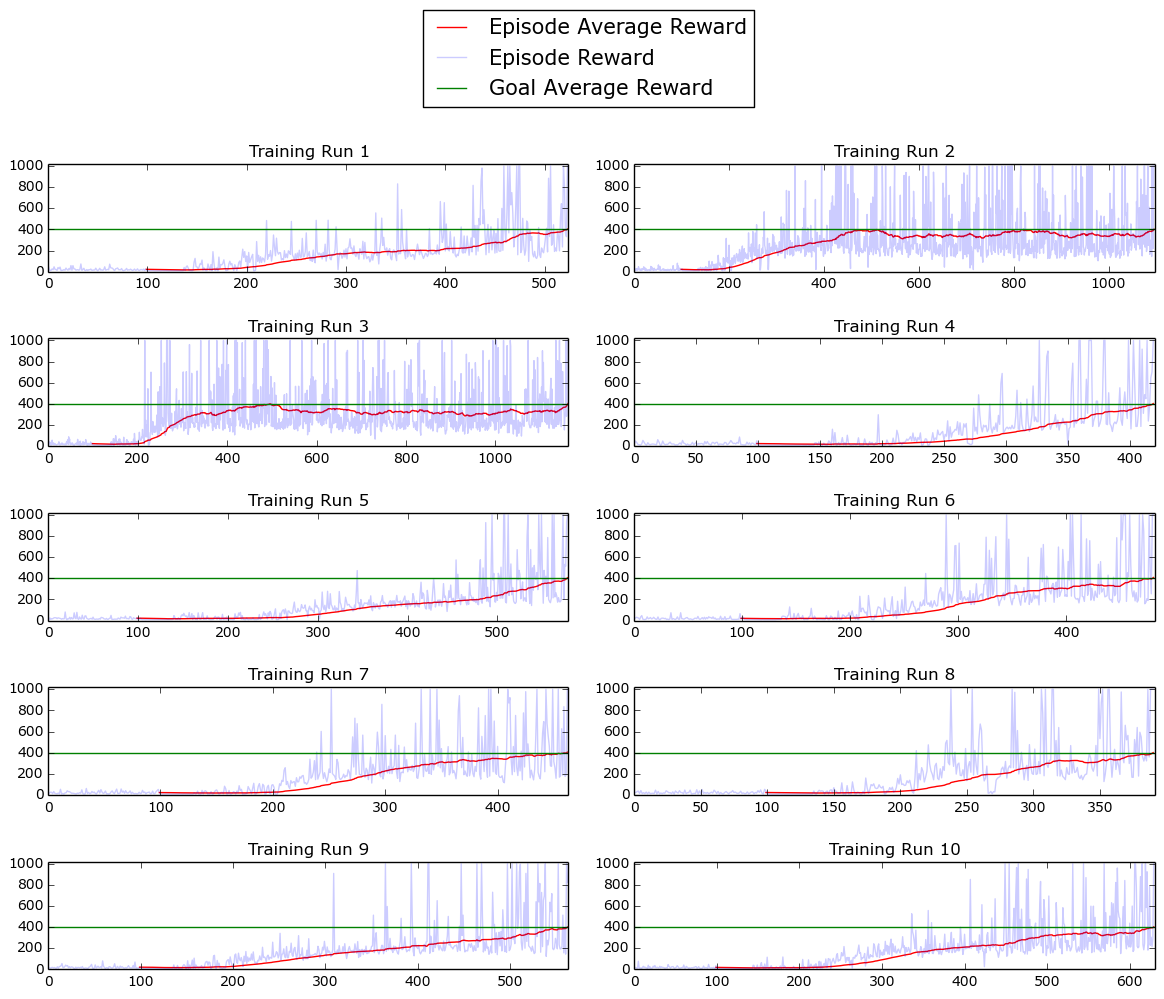

In [5]:
plot_train_runs('Data/', 400, (12,9), None, (0,1020))

<h2>DRQN Cartpole Modified All Test Runs</h2>

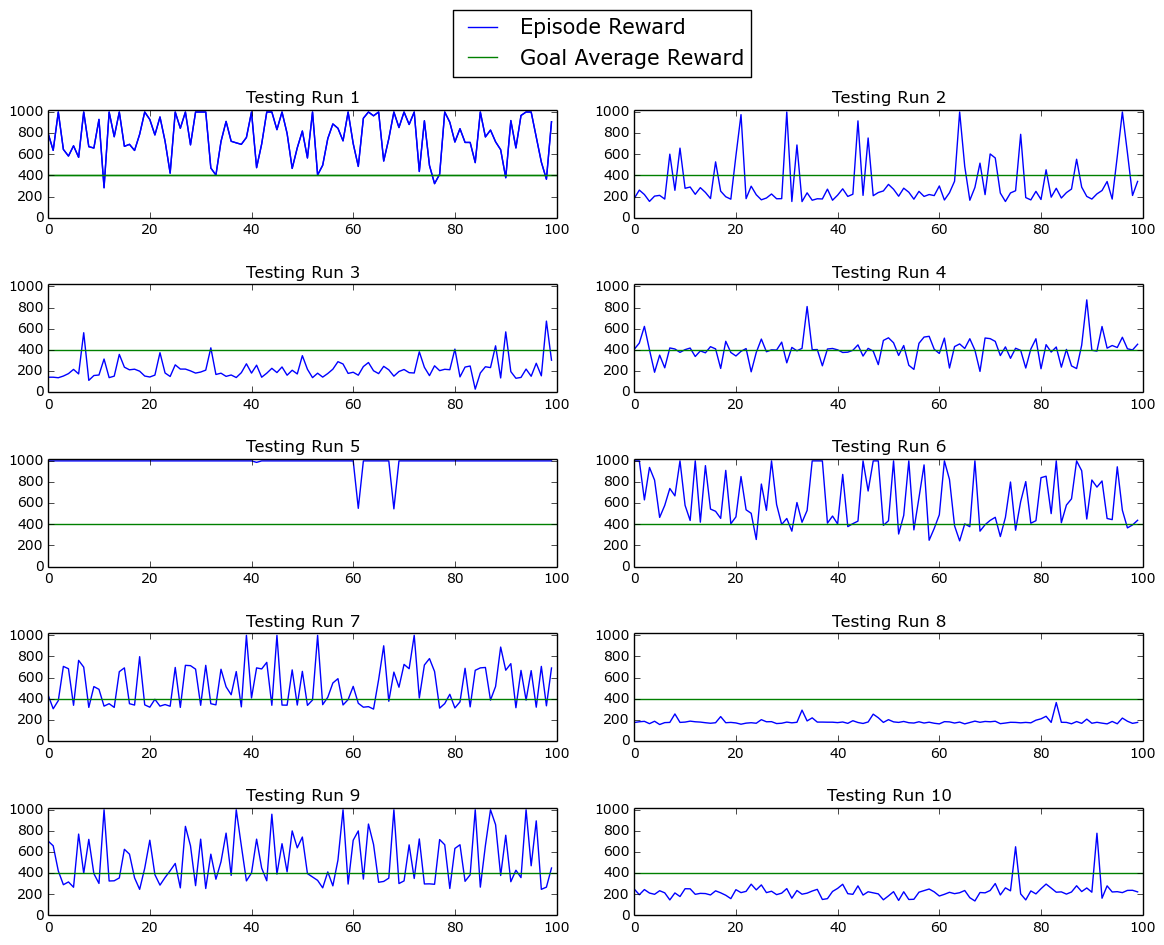

 Run 1 Test Average: 767.080000
 Run 2 Test Average: 317.090000
 Run 3 Test Average: 216.970000
 Run 4 Test Average: 402.060000
 Run 5 Test Average: 990.830000
 Run 6 Test Average: 622.690000
 Run 7 Test Average: 525.370000
 Run 8 Test Average: 183.700000
 Run 9 Test Average: 518.130000
 Run 10 Test Average: 227.820000


In [6]:
plot_test_runs('Data/', 400, (12,9), None, (0,1020))
show_test_average('Data/')

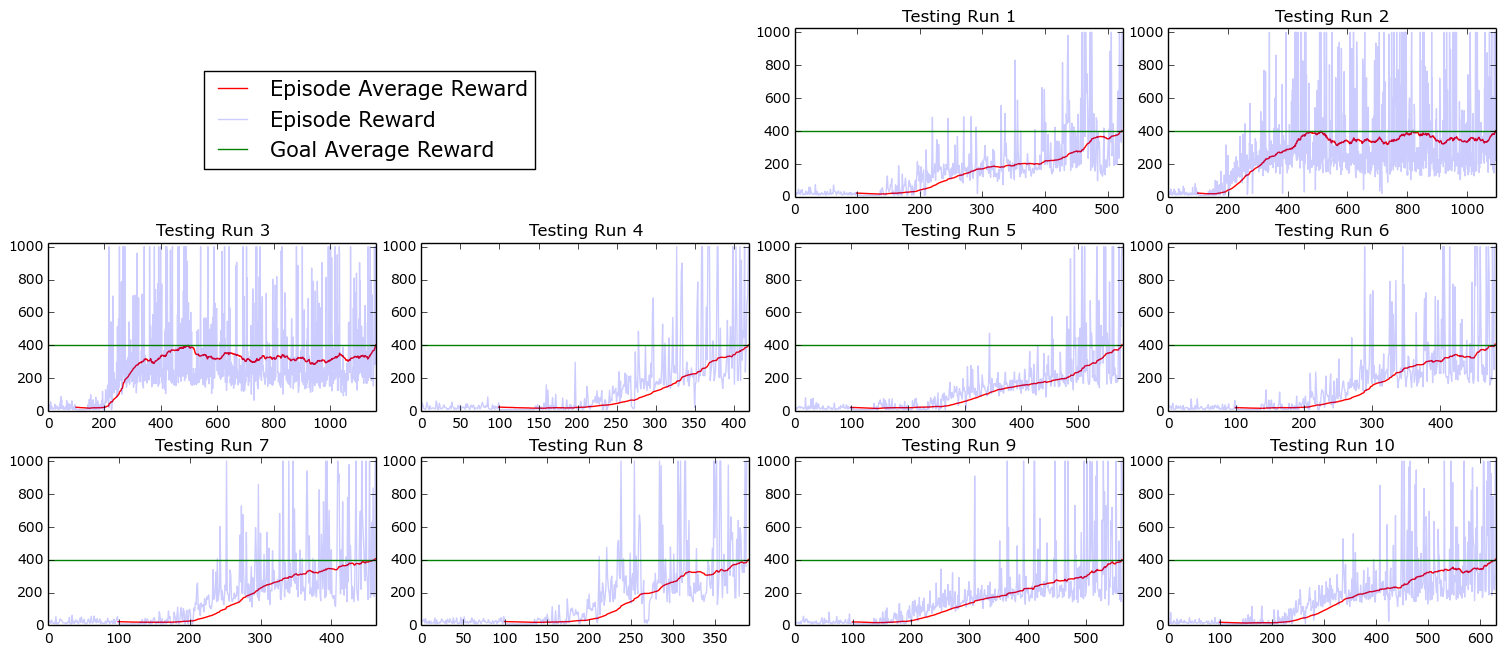

In [8]:
def plot_train_slides(file_dir, goal, figsize=figsize, xlim=None, ylim=None):
    files = os.listdir(file_dir)
    df_trains = []
    for f in files:
        if '.train' in f:
            df_trains.append(pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0))
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=figsize)
    axs = ax.ravel()
    #dummy plot to clear out the top left subplot to place the legend
    for i in range(0, 2):
        axs[i+1].set_color_cycle(['blue', 'green'])
        df = df_trains[0]
        x_end = df.shape[0]
        ttl = 'Dummy Plot'
        axs[i].plot(df['reward'], label='Episode Reward', alpha=1)
        axs[i].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        axs[i].set_xlim((0,x_end))
        axs[i].set_ylim(ylim)
        axs[i].title.set_text(ttl)
    for i, df in enumerate(df_trains):
        axs[i+2].set_color_cycle(['red', 'blue', 'green'])
        x_end = df.shape[0]
        ttl = 'Testing Run ' + str(i+1)
        axs[i+2].plot(df['average_reward'], label='Episode Average Reward')
        axs[i+2].plot(df['reward'], label='Episode Reward', alpha=0.2)
        axs[i+2].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        axs[i+2].set_xlim((0,x_end))
        axs[i+2].set_ylim(ylim)
        axs[i+2].title.set_text(ttl)
    plt.tight_layout(pad=0.5)
    axs[0].set_visible(False)
    axs[1].set_visible(False)
    plt.legend(bbox_to_anchor=(-1.9,3.35), fontsize=15)
    plt.show()
    
plot_train_slides('Data/', 400, (15,6.5), None, (0,1025))

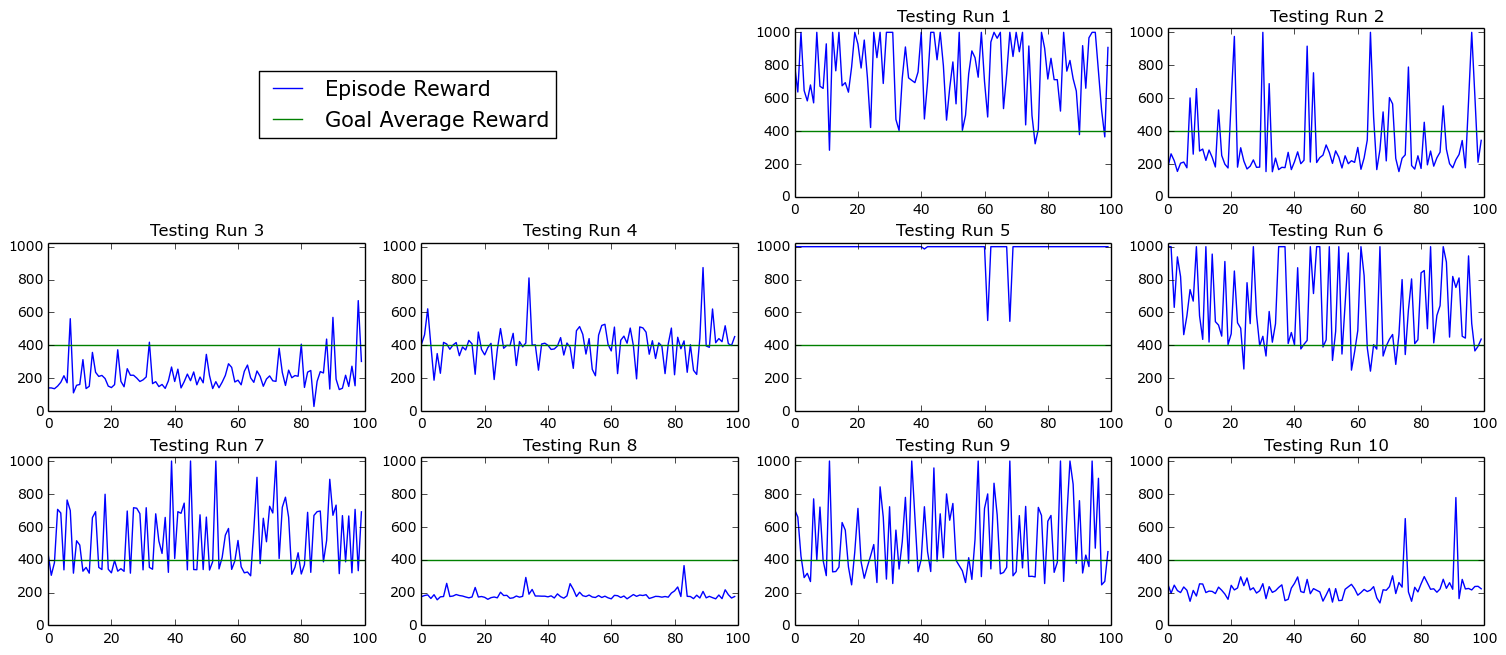

In [9]:
def plot_test_slides(file_dir, goal, figsize=figsize, xlim=None, ylim=None):
    files = os.listdir(file_dir)
    df_trains = []
    for f in files:
        if '.test' in f:
            df_trains.append(pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0))
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=figsize)
    axs = ax.ravel()
    #dummy plot to clear out the top left subplot to place the legend
    for i in range(0, 2):
        axs[i+1].set_color_cycle(['blue', 'green'])
        df = df_trains[0]
        x_end = df.shape[0]
        ttl = 'Dummy Plot'
        axs[i].plot(df['reward'], label='Episode Reward', alpha=1)
        axs[i].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        axs[i].set_xlim((0,x_end))
        axs[i].set_ylim(ylim)
        axs[i].title.set_text(ttl)
    for i, df in enumerate(df_trains):
        axs[i+2].set_color_cycle(['blue', 'green'])
        x_end = df.shape[0]
        ttl = 'Testing Run ' + str(i+1)
        axs[i+2].plot(df['reward'], label='Episode Reward', alpha=1)
        axs[i+2].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        axs[i+2].set_xlim((0,x_end))
        axs[i+2].set_ylim(ylim)
        axs[i+2].title.set_text(ttl)
    plt.tight_layout(pad=0.5)
    axs[0].set_visible(False)
    axs[1].set_visible(False)
    plt.legend(bbox_to_anchor=(-1.9,3.35), fontsize=15)
    plt.show()

plot_test_slides('Data/', 400, (15,6.5), None, (0,1025))